House in USA DataScience Project

Imports

In [91]:
import pandas as pd # data processing
import matplotlib.pyplot as plt # basic plotting 
import numpy as np # linear algebra
import geopandas as gpd # geospatial data
from scipy import stats as st # probability distributions and statistical functions
import seaborn as sns #data visualization library based on matplotlib
import folium #interactive leaflet map

from folium.plugins import FloatImage

from matplotlib.colors import ListedColormap
from shapely.geometry import Point
from sklearn import preprocessing

%matplotlib inline 
plt.style.use('ggplot') # use ggplot style
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
#sns.mpl.rc('figure', figsize=(30,15))

Solucao disponivel no Kaggle
https://www.kaggle.com/code/themohamed2525/house-sales-in-king-county-data-visualization/notebook

In [2]:
#!pip install geopandas

In [104]:
#!pip install folium

# Dataset Overview

**Dataset upload**

In [3]:
df = pd.read_csv("../raw_data/kc_house_data 2.csv", parse_dates=['date'])

**Dataset Overview**

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

**Preprocessing Dataset**

In [6]:
df.duplicated().sum()

0

In [7]:
missing_col = df.isnull().sum().sort_values(ascending=False)
missing_col

id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

## Analysis of number of bedrooms:

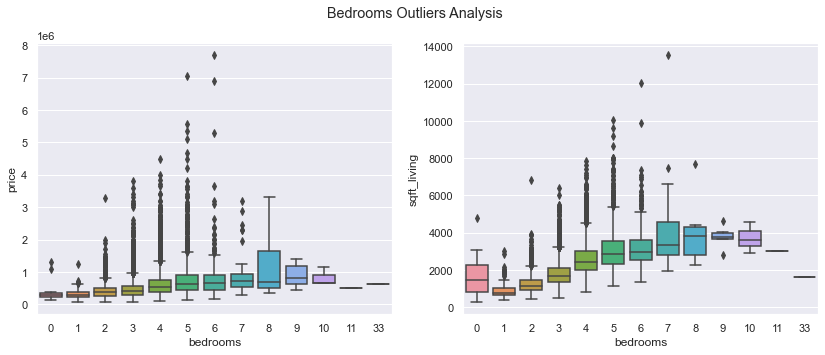

In [8]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize= (14,5))
fig.suptitle('Bedrooms Outliers Analysis')

#create boxplot in each subplot
sns.boxplot(data=df, x="bedrooms", y="price", ax=axes[0])
sns.boxplot(data=df, x="bedrooms", y="sqft_living", ax=axes[1]);

*Quantity of houses with ZERO bedroom and outliers*

In [9]:
no_bed_0 = (df[df['bedrooms']<1].value_counts().sum())
no_bed_11 = (df[df['bedrooms']==11].value_counts().sum())
no_bed_33 = (df[df['bedrooms']==33].value_counts().sum())

perc_no_bed = round((no_bed_0 + no_bed_11 + no_bed_33)*100/len(df),2)
print(f"Excluding the data with ZERO bedrooms and outliers, which represents {perc_no_bed}%")

Excluding the data with ZERO bedrooms and outliers, which represents 0.07%


Graphs shows bedrooms outliers for Zero bedrooms, 11 bedrooms and 33 bedrooms with low prices but high living areas, we will drop the columns, total of 13 lines

### Excluding bedrooms outliers, bedrooms = 0, 11, 33

In [10]:
df = df[(df['bedrooms']>=1) & (df['bedrooms']<11)]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Checking Bathrooms

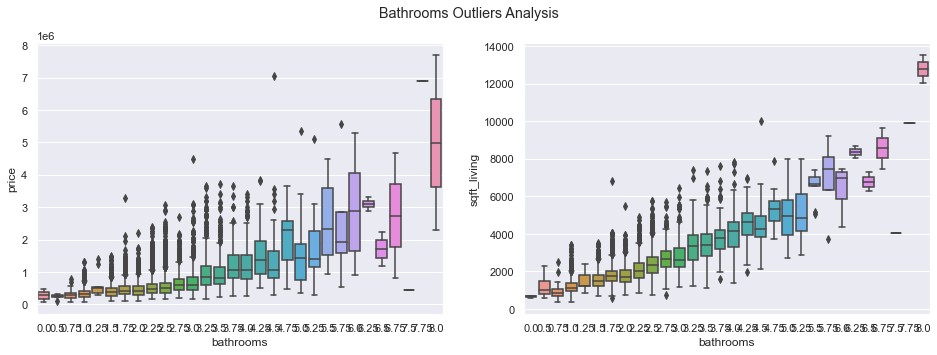

In [11]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize= (16,5))
fig.suptitle('Bathrooms Outliers Analysis')

#create boxplot in each subplot
sns.boxplot(data=df, x="bathrooms", y="price", ax=axes[0])
sns.boxplot(data=df, x="bathrooms", y="sqft_living", ax=axes[1]);

It was not possible to identify any outliers for the bathrooms after cleaning the bedrooms outliers

# Data pre-analysis

**Correlation Matrix**

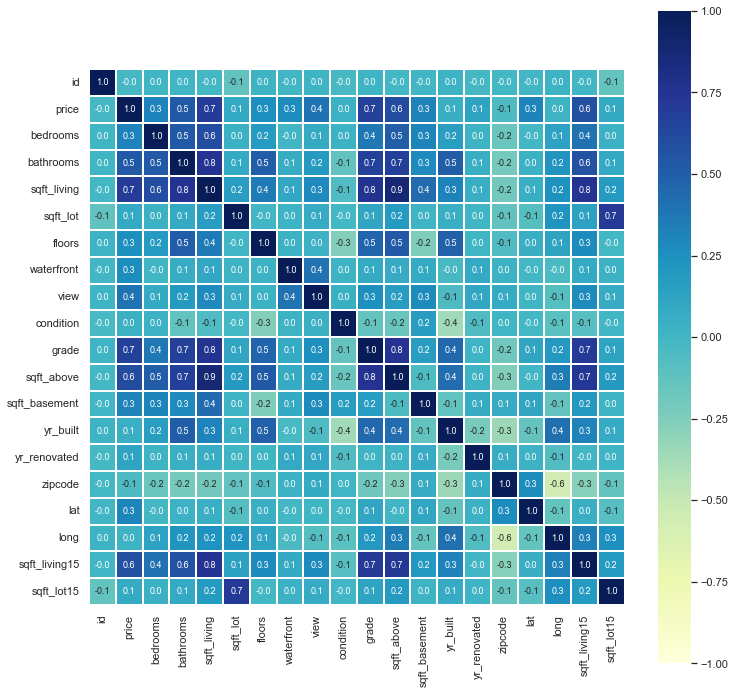

In [12]:
# corr = df.corr() -- Pearson Correlation

fig, ax = plt.subplots(figsize = (12, 12))
# Heatmap
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True, fmt = ".1f", annot_kws = {"fontsize": 9},
            vmin = -1, vmax = 1, square = True, linewidths = 0.01, linecolor = "white", cbar = True)

sns.despine(top = True, right = True, left = True, bottom = True)

**Features correlated with price**

In [13]:
# Focusing on house prices
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701941
grade            0.667781
sqft_above       0.605431
sqft_living15    0.585322
bathrooms        0.525903
view             0.397331
sqft_basement    0.323816
bedrooms         0.316602
lat              0.306850
waterfront       0.266434
floors           0.256901
yr_renovated     0.126510
sqft_lot         0.089830
sqft_lot15       0.082755
yr_built         0.054029
condition        0.036093
long             0.021840
id              -0.016707
zipcode         -0.053353
Name: price, dtype: float64

In [105]:
# Looking at the highest correlation features with price:
df_corr = df[['price', 'sqft_living', 'grade', 'bathrooms', 'bedrooms']]

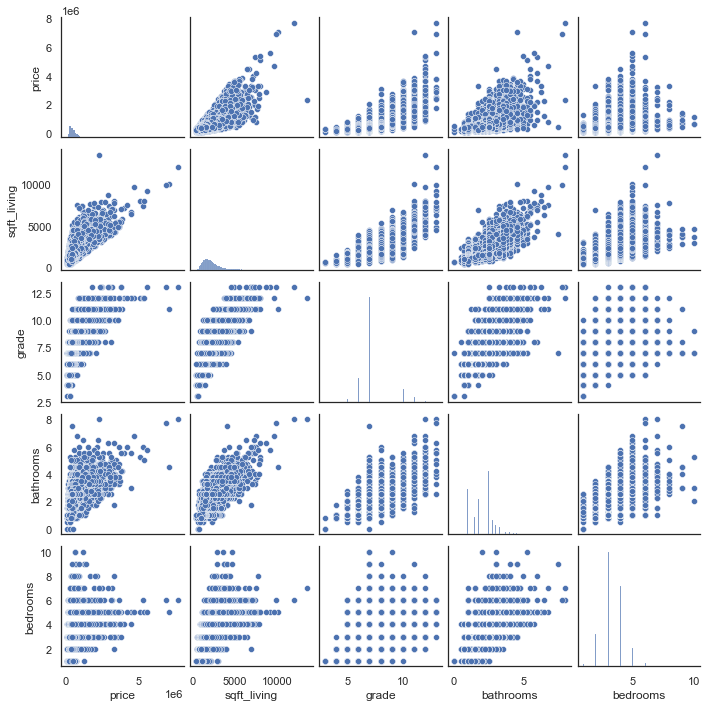

In [106]:
sns.set(style='white')
sns.pairplot(df_corr, height=2)
plt.show()

# Descriptive Analysis

## CEO Queries:

👇  Why the CEO has raised questions about the business plan?

If you were the CEO, why would you ask this? Is your objective to increase income? How is the business performance?

Sales in 2015 has decreased 48% compared to 2014, therefore the business is not performing well compared to previous year

 sales in 2015 has been 47.97% lower than 2014


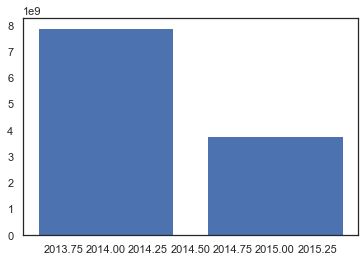

In [17]:
df['df_year'] = df['date'].dt.year
resul = df.groupby('df_year')['price'].sum().reset_index()
resul
plt.bar(resul.df_year, resul.price)
vendas_2014 = resul.price[0]
vendas_2015 = round((resul.price[1]/vendas_2014)*100,2)
#print(vendas_2014)
print(f" sales in 2015 has been {vendas_2015}% lower than 2014")

## Hyphotheses regarding business behaviour

**Bedrooms**

1 - Houses with more bedrooms are more expensive? Why? \
2 - How many rooms does the price increase? \
3 - What is the price increment for each room added?

Casas com muitos quartos são mais caras? Porque? A partir de quantos quartos o preço aumenta? Qual o incremento de preço por cada quarto adicionado?

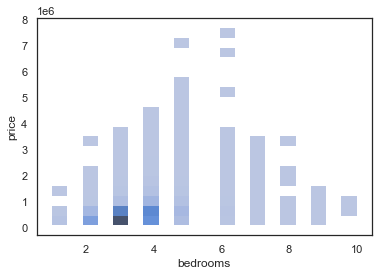

In [18]:
sns.histplot(data = df, x = 'bedrooms', y = 'price', bins = 20, kde = False);

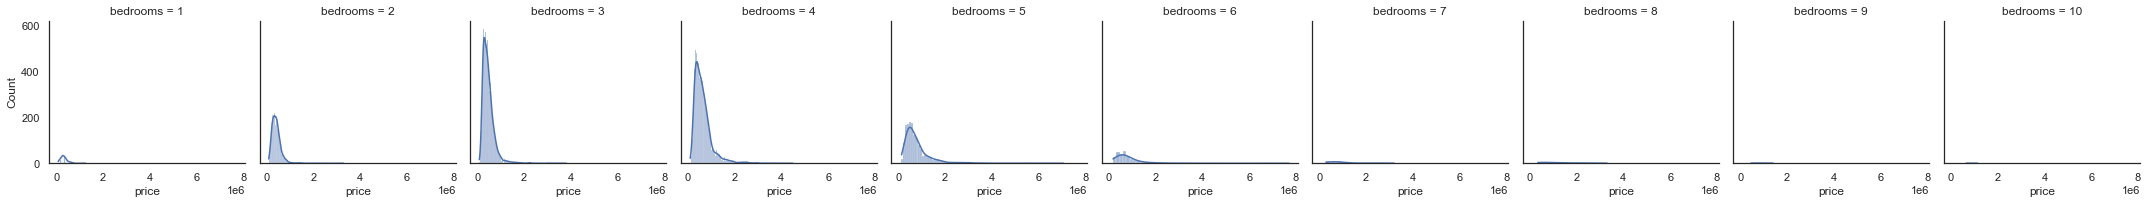

In [19]:
# Your code here
g = sns.FacetGrid(df, col="bedrooms") #row="smoker", hue='smoker'
g.map(sns.histplot, "price", kde=True)

In [20]:
df_bed = df[['price', 'bedrooms']]

In [21]:
from sklearn.preprocessing import OneHotEncoder

df_bed.bedrooms.unique() # Check unique categories in bedrooms

bedrooms_ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder

bedrooms_ohe.fit(df_bed[['bedrooms']]) # Fit one hot encoder

bedrooms_ohe.categories_ # View categories of bedrooms

df_bed['bed1'],df_bed['bed2'],df_bed['bed3'],df_bed['bed4'], df_bed['bed5'], df_bed['bed6'], df_bed['bed7'], df_bed['bed8'], df_bed['bed9'], df_bed['bed10']  = bedrooms_ohe.fit_transform(df_bed[['bedrooms']]).T # Put encoded columns back in dataframe

df_bed.drop(columns=['bedrooms'], inplace = True) # Drop original column

df_bed.head()

/var/folders/s2/rxgrts2d0x3cngcs6yc5fmr40000gn/T/ipykernel_61765/2378801322.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bed['bed1'],df_bed['bed2'],df_bed['bed3'],df_bed['bed4'], df_bed['bed5'], df_bed['bed6'], df_bed['bed7'], df_bed['bed8'], df_bed['bed9'], df_bed['bed10']  = bedrooms_ohe.fit_transform(df_bed[['bedrooms']]).T # Put encoded columns back in dataframe
/Users/vanessalieberg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,bed1,bed2,bed3,bed4,bed5,bed6,bed7,bed8,bed9,bed10
0,221900.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Apply price into each bedroom column
df_bed['bed1_price'] = df_bed['bed1']*df_bed['price']
df_bed['bed2_price'] = df_bed['bed2']*df_bed['price']
df_bed['bed3_price'] = df_bed['bed3']*df_bed['price']
df_bed['bed4_price'] = df_bed['bed4']*df_bed['price']
df_bed['bed5_price'] = df_bed['bed5']*df_bed['price']
df_bed['bed6_price'] = df_bed['bed6']*df_bed['price']
df_bed['bed7_price'] = df_bed['bed7']*df_bed['price']
df_bed['bed8_price'] = df_bed['bed8']*df_bed['price']
df_bed['bed9_price'] = df_bed['bed9']*df_bed['price']
df_bed['bed10_price'] = df_bed['bed10']*df_bed['price']




/var/folders/s2/rxgrts2d0x3cngcs6yc5fmr40000gn/T/ipykernel_61765/4132171089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bed['bed1_price'] = df_bed['bed1']*df_bed['price']
/var/folders/s2/rxgrts2d0x3cngcs6yc5fmr40000gn/T/ipykernel_61765/4132171089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bed['bed2_price'] = df_bed['bed2']*df_bed['price']
/var/folders/s2/rxgrts2d0x3cngcs6yc5fmr40000gn/T/ipykernel_61765/4132171089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [23]:
df_bed.columns

Index(['price', 'bed1', 'bed2', 'bed3', 'bed4', 'bed5', 'bed6', 'bed7', 'bed8',
       'bed9', 'bed10', 'bed1_price', 'bed2_price', 'bed3_price', 'bed4_price',
       'bed5_price', 'bed6_price', 'bed7_price', 'bed8_price', 'bed9_price',
       'bed10_price'],
      dtype='object')

In [24]:
df_bed_price = df_bed[['bed1_price', 'bed2_price', 'bed3_price', 'bed4_price',
       'bed5_price', 'bed6_price', 'bed7_price', 'bed8_price', 'bed9_price',
       'bed10_price']]

In [25]:
df_bed_price.head()

,bed1_price,bed2_price,bed3_price,bed4_price,bed5_price,bed6_price,bed7_price,bed8_price,bed9_price,bed10_price
0,0.0,0.0,221900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,538000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,604000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,510000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_bed_price.describe()

,bed1_price,bed2_price,bed3_price,bed4_price,bed5_price,bed6_price,bed7_price,bed8_price,bed9_price,bed10_price
count,2.159800e+04,2.159800e+04,2.159800e+04,2.159800e+04,2.159800e+04,2.159800e+04,2.159800e+04,2.159800e+04,2.159800e+04,2.159800e+04
mean,2.926703e+03,5.129126e+04,2.120689e+05,2.024705e+05,5.830847e+04,1.039641e+04,1.673535e+03,6.651542e+02,2.483563e+02,1.138068e+02
std,3.353047e+04,1.515515e+05,2.919523e+05,3.684769e+05,2.623004e+05,1.284143e+05,5.027072e+04,3.438313e+04,1.599000e+04,1.003703e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,3.896500e+05,3.565000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.247000e+06,3.278000e+06,3.800000e+06,4.489000e+06,7.062500e+06,7.700000e+06,3.200000e+06,3.300000e+06,1.400000e+06,1.148000e+06


In [27]:
df_bed_price.head()

,bed1_price,bed2_price,bed3_price,bed4_price,bed5_price,bed6_price,bed7_price,bed8_price,bed9_price,bed10_price
0,0.0,0.0,221900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,538000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,604000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,510000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_bed_price.mask(df_bed_price == 0, other = np.nan, inplace=True)

/Users/vanessalieberg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:9032: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(cond, other, inplace, axis, level, errors=errors)


In [29]:
#df_bed_price.replace(0, np.nan, inplace=True)

In [30]:
df_bed_price.describe()

,bed1_price,bed2_price,bed3_price,bed4_price,bed5_price,bed6_price,bed7_price,bed8_price,bed9_price,bed10_price
count,1.990000e+02,2.760000e+03,9.824000e+03,6.882000e+03,1.601000e+03,2.720000e+02,3.800000e+01,1.300000e+01,6.000000e+00,3.000000e+00
mean,3.176429e+05,4.013727e+05,4.662321e+05,6.354195e+05,7.865998e+05,8.255206e+05,9.511847e+05,1.105077e+06,8.939998e+05,8.193333e+05
std,1.488650e+05,1.980518e+05,2.624698e+05,3.885944e+05,5.962040e+05,7.992388e+05,7.399536e+05,8.974957e+05,3.815339e+05,2.846776e+05
min,7.500000e+04,7.800000e+04,8.200000e+04,1.000000e+05,1.330000e+05,1.750000e+05,2.800000e+05,3.400000e+05,4.500000e+05,6.500000e+05
25%,2.220000e+05,2.698375e+05,2.954875e+05,3.769625e+05,4.380000e+05,4.350000e+05,5.392500e+05,4.900000e+05,6.249992e+05,6.550000e+05
50%,2.990000e+05,3.740000e+05,4.130000e+05,5.499975e+05,6.200000e+05,6.500000e+05,7.285800e+05,7.000000e+05,8.170000e+05,6.600000e+05
75%,3.900000e+05,4.900000e+05,5.600000e+05,7.650000e+05,9.138880e+05,8.962500e+05,9.465000e+05,1.650000e+06,1.193500e+06,9.040000e+05
max,1.247000e+06,3.278000e+06,3.800000e+06,4.489000e+06,7.062500e+06,7.700000e+06,3.200000e+06,3.300000e+06,1.400000e+06,1.148000e+06


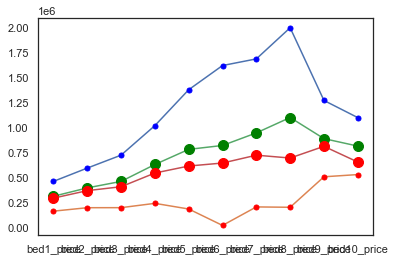

In [31]:
x = df_bed_price.mean() + df_bed_price.std()
y = df_bed_price.mean() - df_bed_price.std()

plt.plot(x, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue" )
plt.plot(y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.plot(df_bed_price.mean(), marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green")
plt.plot(df_bed_price.median(), marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red");

👇  **Respostas**

Ateh 3 quartos o preco aumenta cera de 67mil com desvio padrao de 4,7mil \
A media do crescimento de 4 quartos para 8 quartos eh de 123mil com desvio padrao de 8,8 mil \
Casas superiores a 8 quartos, o preco nao aumenta em funcao do aumento de quartos, o preco cai 75 mil com desvio padrao de 252mil

### Linear Regression model: Price vs Bedrooms

In [32]:
X_bed = df_bed.drop(columns = 'price')
y_bed = df_bed['price']

#### Base Modeling

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model_bed = LinearRegression()

scores_bed = cross_val_score(model_bed, X_bed, y_bed, cv=10)

base_model_score_bed = scores_bed.mean()

base_model_score_bed

1.0

#### OLS Model

In [34]:
df_bed.columns

Index(['price', 'bed1', 'bed2', 'bed3', 'bed4', 'bed5', 'bed6', 'bed7', 'bed8',
       'bed9', 'bed10', 'bed1_price', 'bed2_price', 'bed3_price', 'bed4_price',
       'bed5_price', 'bed6_price', 'bed7_price', 'bed8_price', 'bed9_price',
       'bed10_price'],
      dtype='object')

In [35]:
features_bed = ['bed1', 'bed2', 'bed3', 'bed4', 'bed5', 'bed6', 'bed7', 'bed8',
       'bed9', 'bed10']

In [36]:
formula_bed = "price ~ " + ' + '.join(features_bed)

In [37]:
import statsmodels.formula.api as smf
model_OS_bed = smf.ols(formula = formula_bed, data = df_bed).fit()
print(model_OS_bed.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     257.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:46:13   Log-Likelihood:            -3.0618e+05
No. Observations:               21598   AIC:                         6.124e+05
Df Residuals:                   21587   BIC:                         6.125e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.407e+16   3.19e+16     -0.754      0.4

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

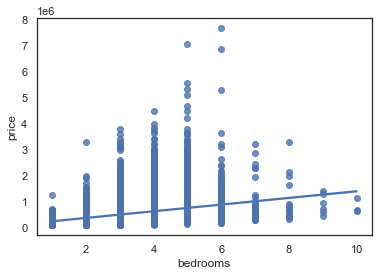

In [38]:
sns.regplot(data = df, x = 'bedrooms', y = 'price')

In [39]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model1 = smf.ols(formula = 'price ~ bedrooms', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2406.
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:46:18   Log-Likelihood:            -3.0625e+05
No. Observations:               21598   AIC:                         6.125e+05
Df Residuals:                   21596   BIC:                         6.125e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.062e+05   9158.878     11.598      0.000    8.83e+04    1.24e+05
bedrooms    1.287e+05   2624.329     49.050      0.000    1.24e+05    1.34e+05
==============================================================================
Omnibus:                    18933.232   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1173587.229
Skew:                           3.945   Prob(JB):                         0.00
Kurtosis:                      38.240   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model1.params

Intercept    106221.090137
bedrooms     128722.405620
dtype: float64

### Checking prices up to 3 bedrooms

In [41]:
df_3bed = df[df['bedrooms'] <=3]

In [43]:
model_3bed = smf.ols(formula = 'price ~ bedrooms', data=df_3bed).fit()
model_3bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           9.62e-46
Time:                        15:46:21   Log-Likelihood:            -1.7694e+05
No. Observations:               12783   AIC:                         3.539e+05
Df Residuals:                   12781   BIC:                         3.539e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.648e+05   1.32e+04     20.108      0.000    2.39e+05    2.91e+05
bedrooms    6.723e+04   4716.963     14.253      0.000     5.8e+04    7.65e+04
==============================================================================
Omnibus:                     9354.989   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274487.646
Skew:                           3.200   Prob(JB):                         0.00
Kurtosis:                      24.781   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model_3bed.params

Intercept    264831.657677
bedrooms      67230.837285
dtype: float64

### Checking prices between 4 to 8 bedrooms

In [45]:
df_4bed = df[(df['bedrooms'] >=4) & (df['bedrooms'] <=8)]

In [46]:
model_4bed = smf.ols(formula = 'price ~ bedrooms', data=df_4bed).fit()
model_4bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     193.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.44e-43
Time:                        15:46:21   Log-Likelihood:            -1.2720e+05
No. Observations:                8806   AIC:                         2.544e+05
Df Residuals:                    8804   BIC:                         2.544e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.462e+05    3.8e+04      3.846      0.000    7.17e+04    2.21e+05
bedrooms    1.231e+05   8844.478     13.917      0.000    1.06e+05     1.4e+05
==============================================================================
Omnibus:                     7052.306   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267355.029
Skew:                           3.567   Prob(JB):                         0.00
Kurtosis:                      29.034   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
model_4bed.params

Intercept    146174.331457
bedrooms     123088.978851
dtype: float64

### Checking prices above 9 bedrooms

In [48]:
df_9bed = df[df['bedrooms'] >=9]

In [49]:
model_9bed = smf.ols(formula = 'price ~ bedrooms', data=df_9bed).fit()
model_9bed.summary()

/Users/vanessalieberg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.129
Method:                 Least Squares   F-statistic:                   0.08771
Date:                Wed, 13 Apr 2022   Prob (F-statistic):              0.776
Time:                        15:46:21   Log-Likelihood:                -126.70
No. Observations:                   9   AIC:                             257.4
Df Residuals:                       7   BIC:                             257.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.566e+06   2.36e+06      0.665      0.528   -4.01e+06    7.14e+06
bedrooms   -7.467e+04   2.52e+05     -0.296      0.776   -6.71e+05    5.22e+05
==============================================================================
Omnibus:                        1.510   Durbin-Watson:                   2.914
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                0.812
Skew:                           0.334   Prob(JB):                        0.666
Kurtosis:                       1.689   Cond. No.                         187.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
model_9bed.params

Intercept    1.565998e+06
bedrooms    -7.466650e+04
dtype: float64

## Location

As casas mais caras estão no centro? Qual a região? Existe alguma coisa na região que tem correlação com valor de venda da casa? Shoppings? Montanhas? Pessoas Famosas?

/Users/vanessalieberg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


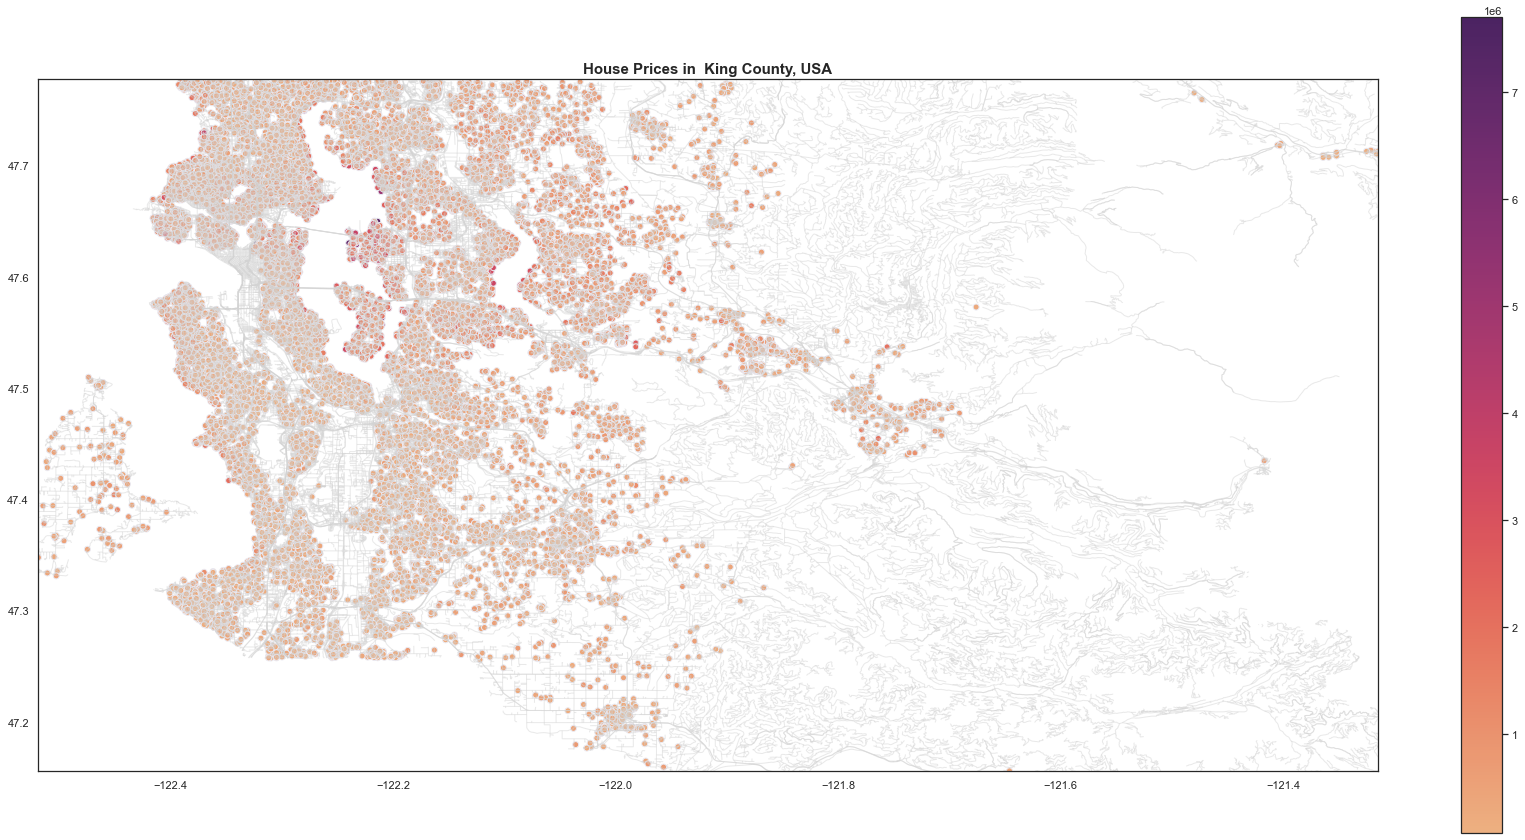

In [84]:
sns.mpl.rc('figure', figsize=(30,15))

# Setting the path to the shapefile
SHAPEFILE = '../raw_data/maps/tl_2017_53033_roads.shp'


# import king county street map
street_map = gpd.read_file(SHAPEFILE)

# designate coordinate system
crs = {'init':"EPSG:3857"}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df,crs = crs,geometry = geometry)


# create figure and axes, assign to subplot
fig, ax = plt.subplots()

# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.5,edgecolor='blue', linewidth=1, color='lightgrey')


# assign ‘price’ variable to represent coordinates on graph
my_cmap = sns.color_palette("flare", as_cmap=True)
geo_df.plot(column='price',ax=ax,   legend=True, cmap=my_cmap , edgecolor='#EAEAF2' ) # 

# add title to graph
plt.title('House Prices in  King County, USA', fontsize=15,fontweight='bold' )

# set latitiude and longitude boundaries for map display
plt.xlim(df['long'].min() ,df['long'].max())
plt.ylim( df['lat'].min() ,df['lat'].max() )

# show map
plt.show()

**Average of prices house sales by zip code on the map** \
The most expensive house is located in Lake Washington (red circle in the map) \
Yelow and green circles are more expenses, they are located in Bellevue and Mercer Island \
Blue circles are average prices \
Darkblue colors have lower prices, few houses close to airports and highways

In [102]:
#add heatmao scall to map 

mymap = folium.Map(location= [df['lat'].min() , df['long'].max()], zoom_start =9) 

# Get the highest average house price
maxave = int(df.groupby(['zipcode']).mean()['price'].max())
meanave = int(df.groupby(['zipcode']).mean()['price'].mean())
minave = int(df.groupby(['zipcode']).mean()['price'].min())
print("Highest City House Price is: ", maxave)
print("Average City House Price is: ", meanave)
print("Lowest City House Price is: ", minave)

# Create a color map to match house prices. White - low price, Black - high price
colormap = ['#00009B' ,'#0099FF' ,'#63FF9B' ,'#FFFB00' ,'#FF2F00' , '#8B0000']

# Add marker info 

for index, row in df.groupby('zipcode').agg({'lat': 'mean','long': 'mean', 'price':'mean', 'zipcode':'count' }).iterrows(): 
    # Set icon color based on price 
    theCol = colormap[ int((len(colormap) - 1 ) *  float( row['price']) / maxave) ]
    markerText =  ( 'Average price : ' + str(round(row['price'], 2) ) +' $' + '\n' + 'Houses sold : ' + str(row['zipcode']) )
    folium.CircleMarker( radius=(row['zipcode'])/15, location=[row['lat'],row['long']], 
                        popup=folium.Popup(markerText,max_width=150,min_width=150), 
                        color= theCol,fill=True,fill_color=theCol, ).add_to(mymap)

FloatImage('https://lh3.googleusercontent.com/proxy/SRXTqZngcyOscx1nR1iB9c4IobPtOn0cEROsZ_wK6CO3nfAjD4e4TDXPDjN3AU2ZLJxzJQaoLJnlqk9zZevN7S2wZZctQysIIKOvigpGatc', bottom=0, left=65).add_to(mymap)
mymap

Highest City House Price is:  2160606
Average City House Price is:  560861
Lowest City House Price is:  234284


# Base Modelling

👇 Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [ ]:
X = df.drop(columns=['price','id','date'])
y = df['price']

👇 Cross validate a linear regression model. The score under variable name saved as `base_model_score`.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

👇 Feature Permutation to identify the importance of each feature in the model

In [ ]:
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=300) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

Removing floors form the model, as it shows the lowest importance

In [ ]:
X_floors = df.drop(columns=['price','id','date', 'floors'])
y = df['price']

In [ ]:
model_floors = LinearRegression()

scores_floors = cross_val_score(model_floors, X_floors, y, cv=10)

base_model_score_floors = scores_floors.mean()

base_model_score_floors

# Multivariate Linear Regression (with statsmodel)

Selecting the features for our model

In [ ]:
df.columns

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [ ]:
formula = "price ~ " + ' + '.join(features)

⚖️ **Standardize the features.**

👉 In a `multivariate linear regression`, we are trying to measure the impact of each feature on the target. 
    
⚠️ Because of scale effects, some features will wrongly be seen as more important than others


📅 , we will discover Machine Learning Algorithms. We will also need to perform some scaling operations before trying to predict any target.

In [ ]:
orders_standardized = df.copy()
for f in features:
    mu = df[f].mean()
    sigma = df[f].std()
    orders_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
orders_standardized

In [ ]:
import statsmodels.formula.api as smf
model_OS = smf.ols(formula = formula, data = orders_standardized).fit()
print(model_OS.summary())